# Project 1 on Machine Learning
#### Svein-Magnus Lommerud and Oliwia Malinowska
#### October 2021

## Exercise 1: Ordinary Least Square (OLS) on the Franke function

In this exercise we are generating our own dataset for the two-dimensional Franke function defined for x, y $\in$ [0,1].

\begin{equation}
    f(x,y)=\frac{3}{4} exp\left(-\frac{(9x-2)^2}{4}+\frac{(9y-2)^2}{4}\right)+\frac{3}{4} exp\left(-\frac{(9x+1)^2}{49}-\frac{(9y+1)^2}{10}\right)\\
    +\frac{1}{2}exp\left(-\frac{(9x-7)^2}{4}-\frac{(9y-3)^2}{4}\right)-\frac{1}{5} exp(-(9x-4)^2-(9y-7)^2)
    \label{eq:Franke_func}
\end{equation}

We define this function as $<<FrankeFunction>>$ in our code. We include the stochastic noise later in the code. In this exercise we will use a polynomial function to fit our data to the true function. 

In [1]:
#Importing necessary libraries

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random
from sklearn.model_selection import train_test_split
np.random.seed(1337)

In [2]:
#Defining the Franke function given in the project text

def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    
    return term1 + term2 + term3 + term4 

The following code is used to visualize the Franke function. The code is copied from the project text.

/tmp/ipykernel_711/1726427098.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


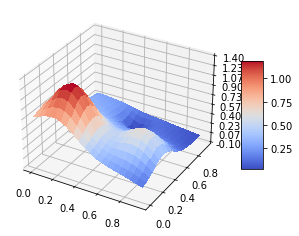

In [3]:
#Copy of the code for 3D plot of franke function given in project text
fig = plt.figure()
ax = fig.gca(projection='3d')


# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)
z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

The following code is where we compute the pseudo matrix inversion from the singular value decomposition, compute the Mean Squared Error and $R^2$ function.

In [4]:
#Code for setting up our design matrix

def create_x(x,y,n):
 
    L = len(x)
    X = np.ones((L, int((n + 1) * (n + 2) / 2)))

    for i in range(n + 1):
        t = int((i) * (i + 1) / 2)
        for j in range(i + 1):
            X[:, t + j] = x ** (i - j) * y ** j

    return X

In [5]:
#Defining the Mean squared error and R2score functions:

def MSE(z, z_pred):
    return np.mean((z - z_pred) ** 2)


def R2(z, z_pred):
    return 1 - np.sum((z - z_pred) ** 2) / np.sum((z - np.mean(z)) ** 2)



This part is without scaling for now.

In [6]:
#Making data set:

N = 100                                  #number of points
n=5                                      #maximum polynomialdegree
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
z = z = FrankeFunction(x, y)


#Performing OSL regression using the pseudo inverse functionality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and without noise:

print("---Before scaling---")
for i in range(1,n+1):
    
    
    X = create_x(x, y, n)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)

    z_t = X_train @ beta
    z_pred = X_test @ beta

    print("--- degree ", i,"---")  
    print("Training R2 for OLS degree")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))

---Before scaling---
--- degree  1 ---
Training R2 for OLS degree
0.993696779197337
Training MSE for OLS
0.0010263286451244122
Test R2 for OLS
0.9923249419223462
Test MSE OLS
0.001145076614589073
--- degree  2 ---
Training R2 for OLS degree
0.9939972911276418
Training MSE for OLS
0.0009520019750248347
Test R2 for OLS
0.9903924919079645
Test MSE OLS
0.0016228294589820068
--- degree  3 ---
Training R2 for OLS degree
0.9940027341132259
Training MSE for OLS
0.0009597352221491067
Test R2 for OLS
0.9907244936272296
Test MSE OLS
0.0014667728045865036
--- degree  4 ---
Training R2 for OLS degree
0.9943414959376908
Training MSE for OLS
0.0009496329261968345
Test R2 for OLS
0.9862822679815522
Test MSE OLS
0.0018037073275060165
--- degree  5 ---
Training R2 for OLS degree
0.9936030352437277
Training MSE for OLS
0.0010644450743318718
Test R2 for OLS
0.9911392147131022
Test MSE OLS
0.0010558880872112877


To scale the data, we are using the StandardScaler function. We are scaling our data because later we want to compare our results with results generated with Scikit functions and those include automatic scaling. But actually our data doesn't need scaling in itself since it is determined between 0 and 1.

To split our data we used the standard way and used 80% of our data as the training data and 20% as the testing data.

In [7]:
#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 with the standardscaler function and without noise
print("---After standardscaler---")
for i in range(1,n+1):
    X = create_x(x, y, n)
   
    X_train_scaled = X_train - np.mean(X_train)
    X_test_scaled = X_test - np.mean(X_test)

    beta = np.linalg.pinv(X_train_scaled.T.dot(X_train_scaled)).dot(X_train_scaled.T).dot(z_train)

    z_t = X_train_scaled @ beta
    z_pred = X_test_scaled @ beta
    print("--- degree ", i,"---")
    print("Training R2 for OLS")
    print(R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    

---After standardscaler---
--- degree  1 ---
Training R2 for OLS
0.9938175922326109
Training MSE for OLS
0.0010287431221276972
Test R2 for OLS
0.9910425124081548
Test MSE OLS
0.0010674115367130903
--- degree  2 ---
Training R2 for OLS
0.9938175922326109
Training MSE for OLS
0.0010287431221276972
Test R2 for OLS
0.9910425124081548
Test MSE OLS
0.0010674115367130903
--- degree  3 ---
Training R2 for OLS
0.9938175922326109
Training MSE for OLS
0.0010287431221276972
Test R2 for OLS
0.9910425124081548
Test MSE OLS
0.0010674115367130903
--- degree  4 ---
Training R2 for OLS
0.9938175922326109
Training MSE for OLS
0.0010287431221276972
Test R2 for OLS
0.9910425124081548
Test MSE OLS
0.0010674115367130903
--- degree  5 ---
Training R2 for OLS
0.9938175922326109
Training MSE for OLS
0.0010287431221276972
Test R2 for OLS
0.9910425124081548
Test MSE OLS
0.0010674115367130903


Here, we can see that the scaling doesn't make a huge difference.

Now, we are adding stochastic noise and exploring this addition for polynomials of different order:

In [8]:
#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 before the data is scaled and with noise

print("---Before scaling with noise---")
for i in range(1,n+1):
    z = FrankeFunction(x, y) + 0.05*np.random.randn(x.shape[0])
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)

    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    z_t = X_train @ beta
    z_pred = X_test @ beta

    print("--- degree ", i,"---")
    print("Training R2 for OLS")
    print (R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))
    

---Before scaling with noise---
--- degree  1 ---
Training R2 for OLS
0.9861569111320553
Training MSE for OLS
0.0020761613312025675
Test R2 for OLS
0.8127517140393758
Test MSE OLS
0.03442680841277026
--- degree  2 ---
Training R2 for OLS
0.9795085006758152
Training MSE for OLS
0.003316331858515452
Test R2 for OLS
0.9685467687136071
Test MSE OLS
0.005709804277476985
--- degree  3 ---
Training R2 for OLS
0.986036881580285
Training MSE for OLS
0.002218170191433599
Test R2 for OLS
0.37692262372668417
Test MSE OLS
0.07612248515646365
--- degree  4 ---
Training R2 for OLS
0.9809074444197889
Training MSE for OLS
0.0029528807018373545
Test R2 for OLS
0.932474180144949
Test MSE OLS
0.011117077453312103
--- degree  5 ---
Training R2 for OLS
0.9801815338221
Training MSE for OLS
0.0033720192624868564
Test R2 for OLS
0.9710995530529286
Test MSE OLS
0.003670355852258324


Although we add a small amount of noise, it has a signicant influence, for instance on the mean squared error for the test data. This influence is particularily visible for the polynomials of the lower order.

And here, with scaling, we see that the mean squared error values increase.

In [9]:
#Preforming OSL regression using the pseudo inverse functuinality in np.linalg in a for loop to give us R2 and MSE 
#for polynomials from degree 1-5 with the standardscaler function and with noise

print("---After standardscaler with noise---")
er_test = np.zeros(n+1)
er_train = np.zeros(n+1)
degree = np.zeros(n+1)
for i in range(1,n+1):
    X = create_x(x, y, n)
    X_train_scaled = X_train - np.mean(X_train)
    X_test_scaled = X_test - np.mean(X_test)
    
    beta = np.linalg.pinv(X_train_scaled.T.dot(X_train_scaled)).dot(X_train_scaled.T).dot(z_train)

    z_t = X_train_scaled @ beta
    z_pred = X_test @ beta
    
    
    
   
    print("--- degree ", i,"---")
    print("Training R2 for OLS")
    print(R2(z_train, z_t))
    print("Training MSE for OLS")
    print(MSE(z_train, z_t))
    print("Test R2 for OLS")
    print(R2(z_test, z_pred))
    print("Test MSE OLS")
    print(MSE(z_test, z_pred))

---After standardscaler with noise---
--- degree  1 ---
Training R2 for OLS
0.9805899742568945
Training MSE for OLS
0.003302525034157462
Test R2 for OLS
0.965332256858775
Test MSE OLS
0.0044028022873147075
--- degree  2 ---
Training R2 for OLS
0.9805899742568945
Training MSE for OLS
0.003302525034157462
Test R2 for OLS
0.965332256858775
Test MSE OLS
0.0044028022873147075
--- degree  3 ---
Training R2 for OLS
0.9805899742568945
Training MSE for OLS
0.003302525034157462
Test R2 for OLS
0.965332256858775
Test MSE OLS
0.0044028022873147075
--- degree  4 ---
Training R2 for OLS
0.9805899742568945
Training MSE for OLS
0.003302525034157462
Test R2 for OLS
0.965332256858775
Test MSE OLS
0.0044028022873147075
--- degree  5 ---
Training R2 for OLS
0.9805899742568945
Training MSE for OLS
0.003302525034157462
Test R2 for OLS
0.965332256858775
Test MSE OLS
0.0044028022873147075


Confidence intervals quantify the uncertainty of our estimation. In our code, we use common 2 standard deviations from the Gaussian distribution, which gives us a significance level of 95%.

In [10]:

def Confidence_interval(beta):
    
    #Factor of 2*sigma
    factor = 1.96
    
    Beta_min = np.mean(beta) - factor*np.std(beta)/np.sqrt(len(beta))
    Beta_max = np.mean(beta) + factor*np.std(beta)/np.sqrt(len(beta))
    
    return Beta_min, Beta_max 

print(Confidence_interval(beta))

(-20670.097747681906, 20670.1078215005)


## Exercise 2: Bias-variance trade-off and resampling techniques

In this exercise we are performing an analysis of the bias-variance trade-off on our test data. The trade-off between reducing the bias and variance of a model is important to understand so that we avoid underfitting or overfitting the data. A good balance leads to a more accurate model.

The bootstrap method is a resampling technique that tests the accuracy of a model's prediction of new data that has not been in the training data. This is done by resampling our dataset with new datapoints. The accuracy of our model will then be given with confidence intervals.


Before we continue with the bias-variance trade-off analysis, we generate a figure that displays the Mean Squared Error for the test and training data. 

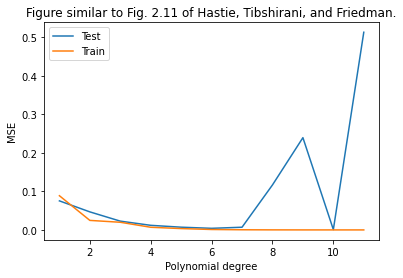

In [11]:
# Code for making first a figure similar to Fig. 2.11 of Hastie, Tibshirani, and Friedman. Figure 2.11 comparing the MSE
#of our training and test data

n = 10
N = 100
er_test = np.zeros(n+1)
er_train = np.zeros(n+1)
degree = np.zeros(n+1)
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)

z = FrankeFunction(x, y)


for i in range(n+1):

    X = create_x(x, y, i)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    z_t = X_train.dot(beta)
    z_pred = X_test.dot(beta)
    degree[i] = i+1
    er_test[i] = MSE(z_test, z_pred)
    er_train[i] = MSE(z_train, z_t)
    

plt.plot(degree, er_test, label="Test")
plt.plot(degree, er_train, label="Train")
plt.title("Figure similar to Fig. 2.11 of Hastie, Tibshirani, and Friedman.")
plt.xlabel("Polynomial degree")
plt.ylabel("MSE")
plt.legend()
plt.show()

Here, the possible high variance region is when the test graph deviates significantly from the training graph. The reason for that is explained later.

We do also a similar analysis but for the $R^2$ score function.

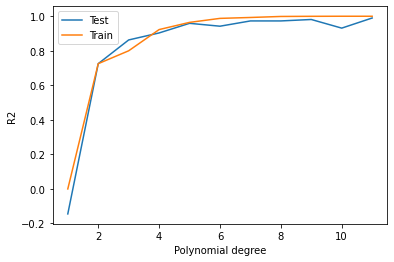

In [12]:
#Did the same thing as above but comparing R2score instead of MSE
n = 10
N = 100
er_test = np.zeros(n+1)
er_train = np.zeros(n+1)
degree = np.zeros(n+1)
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
z = FrankeFunction(x, y)

for i in range(n+1):

    X = create_x(x, y, i)
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.2)
    beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(z_train)
    z_t = X_train.dot(beta)
    z_pred = X_test.dot(beta)
    degree[i] = i+1
    er_test[i] = R2(z_test, z_pred)
    er_train[i] = R2(z_train, z_t)

plt.plot(degree, er_test, label="Test")
plt.plot(degree, er_train, label="Train")
plt.xlabel("Polynomial degree")
plt.ylabel("R2")
plt.legend()
plt.show()

The bias-variance trade-off analysis:
The parameters $\beta$ can be determined from the "cost function":


\begin{equation}
    C(\textbf{X}, \textbf{$\beta$})=\frac{1}{n}\sum_{i=0}^{n-1}(\textbf{y_i}-$\tilde{y_i}$)^2 = \mathbb{E}[(\textbf{y}-\tilde{y})^2]
    \label{eq:cost_function}
\end{equation}

This can be rewritten in the following way:



Using $\textbf{y}=f(x)+\epsilon$, we get:
\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]=\mathbb{E}[(f(x)+\epsilon+\tilde{y})^2]
    \label{eq:cost_function}
\end{equation}

By adding and subtracting $\mathbb{E}$, we get:
\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]=\mathbb{E}[(f(x)+\epsilon+\tilde{y}+\mathbb{E}[\tilde{y}]-\mathbb{E}[\tilde{y}])^2]
    \label{eq:cost_function}
\end{equation}


Further calculation (included in the appendix) takes us to the following expression:
By adding and subtracting $\mathbb{E}$, we get:

\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]= \mathbb{E}[(f-\mathbb{E}[\tilde{y}])^2] + \mathbb{E}[(\tilde{y}-\mathbb{E}[\tilde{y}])^2] + \mathbb{E}[\epsilon^2] \\
    + 2\mathbb{E}[\epsilon]\mathbb{E}[(f-\mathbb{E}[\tilde{y}])] + 2\mathbb{E}[\epsilon]\mathbb{E}[(\mathbb{E}[\tilde{y}]-\tilde{y})]\\
    +\mathbb{E}[(\mathbb{E}[\tilde{y}]-\tilde{y})*2(f-\mathbb{E}[\tilde{y}])]
    \label{eq:cost_function}
\end{equation}

Calculating further, in the last term we would get an expectation value of an expectation value which is the expectation value itself, which means the last term is equal to zero:
\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]= \mathbb{E}[(f-\mathbb{E}[\tilde{y}])^2] + \mathbb{E}[(\tilde{y}-\mathbb{E}[\tilde{y}])^2] + \mathbb{E}[\epsilon^2] \\
    + 2\mathbb{E}[\epsilon]\mathbb{E}[(f-\mathbb{E}[\tilde{y}])] + 2\mathbb{E}[\epsilon]\mathbb{E}[(\mathbb{E}[\tilde{y}]-\tilde{y})]
    \label{eq:cost_function}
\end{equation}

In the last two terms, we have a $\mathbb{E}[\epsilon]$ factor which is equal to zero, since $\epsilon$ is normally distributed. These two terms will therefore cancel out.
We end up with:
\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]= \mathbb{E}[(f-\mathbb{E}[\tilde{y}])^2] + \mathbb{E}[(\tilde{y}-\mathbb{E}[\tilde{y}])^2] + \sigma^2,
    \label{eq:cost_function}
\end{equation}

where $\sigma^2$ is used instead of $\mathbb{E}[\epsilon^2]$.

This can also be written as:
\begin{equation}
    \mathbb{E}[(\textbf{y}-\tilde{y})^2]= \frac{1}{n}\sum_i(f_i-\mathbb{E}[\tilde{y}])^2 + \frac{1}{n}\sum_i(\tilde{y_i}-\mathbb{E}[\tilde{y}])^2 + \sigma^2.
    \label{eq:cost_function}
\end{equation}

The first term means bias, which is the difference between the correct value that we are attempting to predict, and the average prediction of the given model. The second term means variance, which is the variation of the prediction compared to each data point, and the last being the irreducible error, which is the noise in our data that we can not get rid of.

High bias means little focus on the training data and that our model gets oversimplified. This leads to high error rates on both the test and training data. A model with high variance means big focus on the training data, but the error rate on the test data is high since the model will not adapt well to new data points that deviate from the rest. 

And here comes the code for the bootstrap method:

In [13]:
#importing libraries needed for bootstrap as shown in lecture notes week 36
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [14]:
def mse_decomposition(data, data_pred):
    mse = np.mean(np.mean((data - data_pred)**2, axis=1, keepdims=True))
    bias = np.mean((data - np.mean(data_pred, axis=1, keepdims=True))**2) # E(data_pred) -> take expected value of each column vector
    variance = np.mean((data_pred - np.mean(data_pred, axis=1, keepdims=True))**2)
    return mse, bias, variance


def bootstrap(x_train, x_test, z_train, z_test, n_bootstrap, degree):
    
        
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression(fit_intercept=False))
    z_t = np.zeros((z_train.shape[0], n_bootstrap))
    z_pred = np.zeros((z_test.shape[0], n_bootstrap))
    
    
    for i in range(n_bootstrap): 
        x_boot, z_boot = resample(x_train, z_train)
    
        model.fit(x_boot, z_boot)
        z_t[:,i] = model.predict(x_train)
        z_pred[:,i] = model.predict(x_test)
        
    mse_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
    mse_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_t)
    
    return mse_train, mse_test, bias_test, var_test



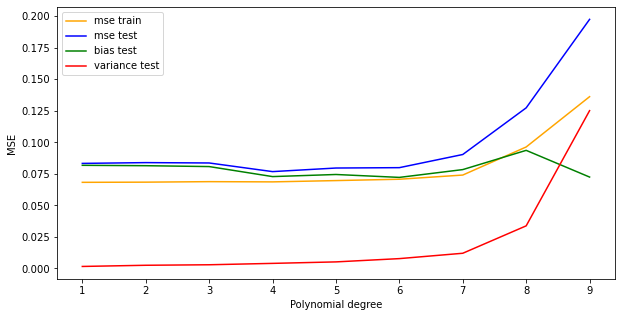

In [15]:
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
x = np.ravel(x).reshape(np.size(x), 1)
y = np.ravel(y).reshape(np.size(y), 1)
z = FrankeFunction(x, y)
z = np.ravel(z)

#This part is copied from lecture notes, weak 37
from_deg = 1; to_deg = 10 # 17
errors_train = np.zeros(to_deg-from_deg)
errors_test = np.zeros_like(errors_train)
biases = np.zeros_like(errors_train)
variances = np.zeros_like(errors_train)

x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.2, random_state=1337) 
for d in range(from_deg, to_deg):
    error_train, error_test, bias_test, var_test = bootstrap(x_train, x_test, z_train, z_test, 100, d)
    errors_train[d-from_deg] = error_train # subtract from_deg to start at index 0
    errors_test[d-from_deg] = error_test 
    biases[d-from_deg] = bias_test
    variances[d-from_deg] = var_test

plt.figure(figsize=[10, 5])
degrees = range(from_deg, to_deg)
plt.plot(degrees,errors_train, c='orange', label='mse train')
plt.plot(degrees, errors_test, c='b', label='mse test')
plt.plot(degrees, biases, c='g', label='bias test')
plt.plot(degrees, variances, c='r', label='variance test')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend()
plt.show()
    


We plotted the Mean Squared Error for the test and train data, including the bias and variance part for the test data. From this plot we can deduct that for a higher polynomial degree the model becomes overfitted since the variance increases and the bias decreases. This part of the plot indicated that error rates on the test data is high, since our model is not adapting well to new data points that deviate from the rest, as mentioned above.

When our model passes degree 6 the Mean Squared Error for training data increases significantly compared to lower degrees. Unfortunately, we don't see any decrease in the MSE, but between polynomial degree 3 and 4, the bias line is slightly decreasing and in that interval we see the best possible bias-variance trade-off for this model.



## Exercise 3: Cross-validation as resampling techniques, adding more complexity

In this exercise, we study the cross-validation method. This is also a statistical method that is used to test the accuracy of a machine learning model on a new (resampled) data. The resulting estimates from cross-validation method usually have smaller bias than from other methods. The first part is our own code for the cross-validation and the other part (of the same function) is where we use Scikit-Learn. We evaluate again the Mean Squared Error here and compare it with the one from the bootstrap code.

Cross-validation_sk:  [ 26.4523557    1.62303466   1.41463388  30.31432297 657.78452082
   1.03736324  18.75168688   7.908274     5.56241546 241.37510929] kfold_scores_sk:  [0.01104178 0.01068806 0.01504146 0.00721805 0.0115849  0.00750754
 0.00655399 0.01206395 0.01343145 0.02062574]


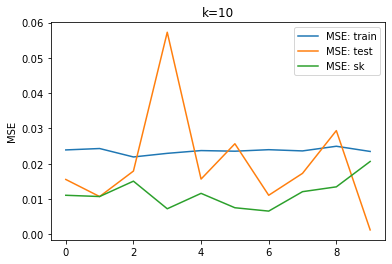

Cross-validation_sk:  [5797.13412541 1147.28258752  154.31419363  292.57022975] kfold_scores_sk:  [0.01139243 0.01180564 0.01221413 0.01052608]


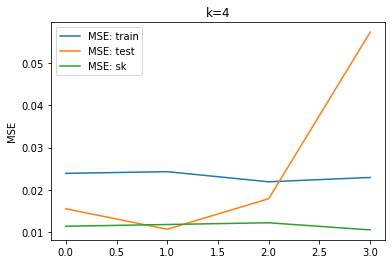

In [16]:
import numpy as np
import random #to shuffle
np.random.seed(1337)

#Own code for k-fold cross-validation:

def CrossValidation(k, x, y, z):

    #Two arrays that will store MSE train and test:
    kfold_scores_train = np.zeros(k)
    kfold_scores_hold  = np.zeros(k)
    
    x = np.array(x)
    y = np.array(y)
    z = np.array(z)
    
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()

    #Splitting the data into k groups:
    
    x = np.array(np.split(x, k))
    y = np.array(np.split(y, k))
    z = np.array(np.split(z, k))
    
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    

    l = 0
    #Going through each group:
    for i in range(k):

        #Removing the i group of x, y and z and saving them as test/hold out data set:
        x_hold = x[i:i+1]
        y_hold = y[i:i+1]
        z_hold = z[i:i+1]
        
        #Debugging:
        x_hold = x_hold.flatten()
        y_hold = y_hold.flatten()
        z_hold = z_hold.flatten()

        #The other groups are saved as the training data set (by deleting the one used as the test data):
        x_train = np.delete(x, i, axis=None)
        y_train = np.delete(y, i, axis=None)
        z_train = np.delete(z, i, axis=None)
        
        #Debugging:
        x_train = x_train.flatten()
        y_train = y_train.flatten()
        z_train = z_train.flatten()
        
        n = 3

        #Combining the training and testing data sets:
        X_hold  = create_x(x_hold,  y_hold,  n)
        X_train = create_x(x_train, y_train, n)

        #Scaling:
        X_hold_scaled  = X_hold  - np.mean(X_hold)
        X_train_scaled = X_train - np.mean(X_train)

        #Fitting the model on the training set:
        Beta = np.linalg.pinv(X_train_scaled.T.dot(X_train_scaled)).dot(X_train_scaled.T).dot(z_train)

        #Evaluating the model on the testing set:
        z_predict_hold  = X_hold  @ Beta
        z_predict_train = X_train @ Beta
    

        #Saving the MSE:
        kfold_scores_hold[l]  = MSE(z_hold,  z_predict_hold)
        kfold_scores_train[l] = MSE(z_train, z_predict_train)
        
        l += 1

    #Scikit-Learn cross-validation:
    from sklearn.model_selection import KFold
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score

    #KFold function shuffles the data and splits the data into k groups
    kfold = KFold(n_splits = k, shuffle=True)
        
        
    kfold_scores_sk  = np.zeros((kfold.get_n_splits()))
    
    X_sk = create_x(x, y, n)
    j = 0

    for train, hold in kfold.split(X_sk):
        X_hold_sk  = X_sk[hold]
        z_hold_sk  = z[hold]

        X_train_sk = X_sk[train]
        z_train_sk = z[train]

        #Finding beta using Scikit OLS:
        linreg  = LinearRegression()
        Beta_sk = linreg.fit(X_train_sk, z_train_sk)

        z_t     = Beta_sk.predict(X_train_sk)
        z_pred  = Beta_sk.predict(X_hold_sk)
            
        kfold_scores_sk[j] = np.sum((z_pred - z_hold_sk)**2)/np.size(z_pred)

        j += 1
        
    Scikit_CV = cross_val_score(Beta_sk, X, z, scoring='neg_mean_squared_error', cv=kfold)
    print("Cross-validation_sk: ", -Scikit_CV, "kfold_scores_sk: ", kfold_scores_sk)

    return kfold_scores_hold, kfold_scores_train, kfold_scores_sk


N = 100 #number of data points

#Calling the functions
x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
z = FrankeFunction(x, y)

kfold_scores_hold, kfold_scores_train, kfold_scores_sk = CrossValidation(10, x, y, z)


plt.plot(kfold_scores_train, label='MSE: train')
plt.plot(kfold_scores_hold, label='MSE: test')
plt.plot(kfold_scores_sk, label='MSE: sk')
plt.title("k=10")

#plt.xlabel()
plt.ylabel('MSE')

plt.legend()
plt.show()

#Changing k
kfold_scores_hold, kfold_scores_train, kfold_scores_sk = CrossValidation(4, x, y, z)

plt.plot(kfold_scores_train, label='MSE: train')
plt.plot(kfold_scores_hold, label='MSE: test')
plt.plot(kfold_scores_sk, label='MSE: sk')
plt.title("k=4")

#plt.xlabel()
plt.ylabel('MSE')

plt.legend()
plt.show()


The big difference between the MSE from the bootstrap code and from cross-validation is that here the MSE for the test data fluctuates significantly more. Unfortunately, the plots are not easy to compare with the one from the boostrap code, because of lacking degreee dependence in the cross-validation code. 

## Exercise 4: Ridge Regression on the Franke function with resampling

In this exercise we will look at the Ridge method, which is a linear regression method extended with a regularization penalty that reduces the coefficients of the input data during training. This method is especially useful when the number of variables is much higher than the number of samples. By using normal linear regression in a case like this we end up with an oversensitive and unstable model.


In [17]:



#defining the bootstrapp function as shown in week 36 lecture notes
def bootstrap_ridge(X_train, X_test, z_train, z_test, n_bootstrap):

    z_pred = np.empty((z_test.shape[0], n_bootstrap))
    
    
    for n in range(n_bootstrap):
        X_, z_ = resample(X_train, z_train)
        
        beta = np.linalg.pinv(X_.T.dot(X_)).dot(X_.T).dot(z_)
        z_pred[:, n] = X_test.dot(beta).ravel()
       
        
        
    error = np.mean(np.mean((z_test - z_pred) ** 2, axis=1, keepdims=True))
    bias = np.mean((z_test - np.mean(z_pred, axis=1, keepdims=True)) ** 2)
    variance = np.mean(np.var(z_pred, axis=1, keepdims=True))

    return error, bias, variance


N = 100
degree = 10
x = np.sort(np.random.uniform(0, 1, N))
y = np.sort(np.random.uniform(0, 1, N))
x, y = np.meshgrid(x,y)
z = FrankeFunction(x,y)   
X = create_x(xt, y, degree)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)

for i in range(degree):
    bootrap

NameError: name 'xt' is not defined

## Exercise 5: Lasso Regression on the Franke function with resampling

In this exercise we will look at the Lasso Regression, which is similar to the Ridge Regression. In the Lasso Regression, however, the coefiicients mentioned above can be reduced to zero which makes the given input predictors disappear. 

In [ ]:
#Scikit Learn
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
np.random.seed(1337)

def Lasso_with_bootstrap(X_train, X_test, z_train, z_test, lambd, n):
    
    #alpha is our lambda (factor of the penalty)
    #1.0 means full penalty
    model = Lasso(alpha=lambd)
    
    #Fitting the model:
    model.fit(X_train, z_train)
    
    z_t = np.zeros((z_train.shape[0], n))
    z_pred = np.zeros((z_test.shape[0], n))
    
    for i in range(n):
        x_boot, z_boot = resample(x_train, z_train)
    
        model.fit(x_boot, z_boot)
        z_t[:,i] = model.predict(x_train)
        z_pred[:,i] = model.predict(x_test)
    mse_test, bias_test, var_test = mse_decomposition(z_test.reshape(-1,1), z_pred)
    mse_train, bias_train, var_train = mse_decomposition(z_train.reshape(-1,1), z_t)
    
    return mse_train, mse_test, bias_test, var_test


#Calling the function (copied from the bootstrap exercise)

x = np.random.uniform(0, 1, N)
y = np.random.uniform(0, 1, N)
x = np.ravel(x).reshape(np.size(x), 1)
y = np.ravel(y).reshape(np.size(y), 1)
z = FrankeFunction(x, y)
z = np.ravel(z)


from_deg = 1; to_deg = 10 # 17
errors_train = np.zeros(to_deg-from_deg)
errors_test = np.zeros_like(errors_train)
biases = np.zeros_like(errors_train)
variances = np.zeros_like(errors_train)

x_train, x_test, z_train, z_test = train_test_split(x, z, test_size=0.2, random_state=1337) 

for d in range(from_deg, to_deg):
    error_train, error_test, bias_test, var_test = Lasso_with_bootstrap(x_train, x_test, z_train, z_test, 100, d)
    errors_train[d-from_deg] = error_train # subtract from_deg to start at index 0
    errors_test[d-from_deg] = error_test 
    biases[d-from_deg] = bias_test
    variances[d-from_deg] = var_test

plt.figure(figsize=[10, 5])
degrees = range(from_deg, to_deg)
plt.plot(degrees,errors_train, c='orange', label='mse train')
plt.plot(degrees, errors_test, c='b', label='mse test')
plt.plot(degrees, biases, c='g', label='bias test')
plt.plot(degrees, variances, c='r', label='variance test')
plt.xlabel('Polynomial degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

x = x.flatten()
y = y.flatten()
z = z.flatten()

#Cross-validation:

lambdas = np.logspace(-5, 5)

def Lasso_cross_validation(k, x, y, z, lambd):
    
    #Scikit-Learn cross-validation:
    from sklearn.model_selection import KFold
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import cross_val_score
    from sklearn.linear_model import Lasso

    #KFold function shuffles the data and splits the data into k groups
    kfold = KFold(n_splits = k, shuffle=True)
    
    MSE_lambdas = np.zeros(len(lambdas))
    
    #kfold_scores_sk  = np.zeros((kfold.get_n_splits()))
    #kfold_train = np.zeros((kfold.get_n_splits()))
    #kfold_hold  = np.zeros((kfold.get_n_splits()))

    X_sk = create_x(x, y, n)
    
    j = 0
    for lambd in lambdas:
        lasso = Lasso(alpha = lambd)
        MSE = cross_val_score(lasso, X_sk, z, scoring='neg_mean_squared_error', cv=k)
        MSE_lambdas[j] = np.mean(-MSE)
        j += 1
    
    return MSE_lambdas  

MSE_lambdas = Lasso_cross_validation(10, x, y, z, 100)
plt.plot(MSE_lambdas)
plt.xlabel("lambda")
plt.ylabel("MSE")
plt.show()


The first plot ilustrates that most of the mean squared error in the test data comes from the bias part. The second plot illustrates cross-validation of the Lasso model for kfold=10.

## Exercise 6: Analysis of real data 

In this exercise we will repeat everything from the previous exercises but using a real data.

## References

1. M. Hjorth-Jensen. 'Overview of course material: Data Analysis and Machine Learning'. Accessed from https://compphysics.github.io/MachineLearning/doc/web/course.html



## Appendix

Calculation from Exercise 2:
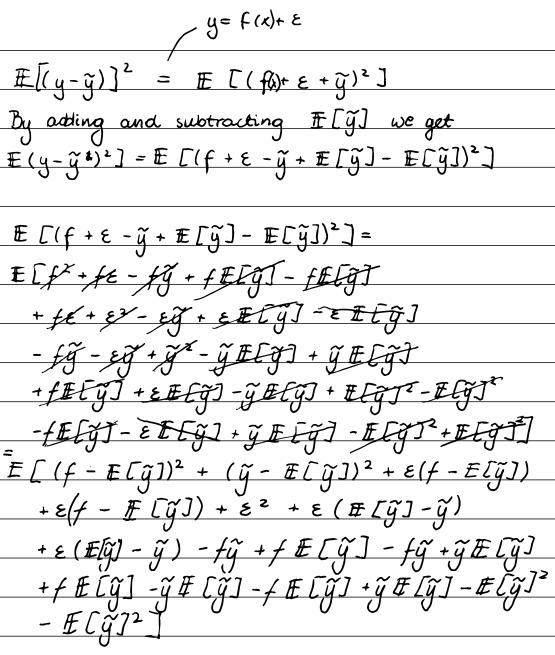


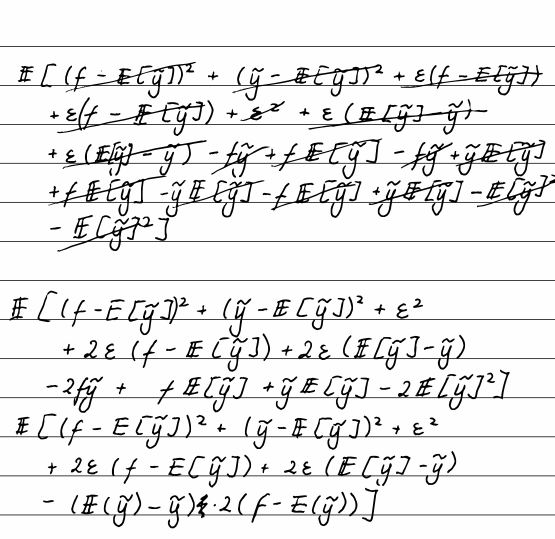

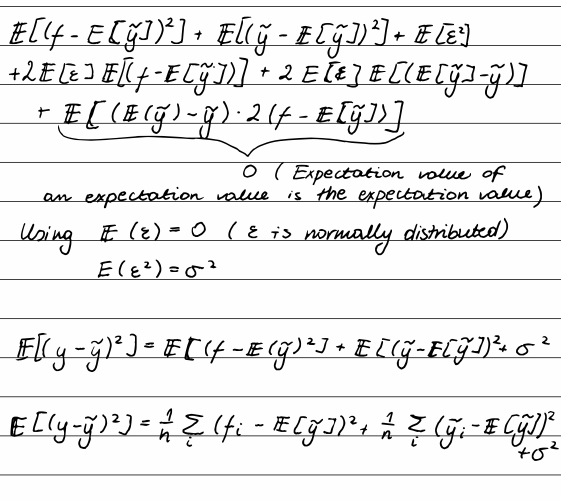